In [1]:
%load_ext autoreload
%autoreload 2

from collections import OrderedDict
import json
import sys
sys.path.append('src')

import numpy as np
from sklearn.cluster import KMeans

from bridge_base_new import Bridge, Support, ZkLoad
#from bridge import Bridge_64, Bridge_160

## ËÆ°ÁÆó

### ËæìÂÖ•ÂèÇÊï∞

In [105]:
# Â∏∏Èáè
E = 21 * 10**10           # Êù®Ê∞èÊ®°Èáè (Pa)
P = 1                     # Â§ñÂäõ    (kN)
h = 2.52                  # ÊÅíËΩΩ    (kN)
bottom_chord_length = 10.   # ‰∏ãÂº¶ÊùÜÈïøÂ∫¶/‰∏ãËäÇÁÇπÈó¥Ë∑ù (m)
bridge_len = 160
path = './data/160'

zk_load = ZkLoad(uniform_len=160)
bridge = Bridge(bridge_len)

### ËØªÂÖ•Êï∞ÊçÆ

In [106]:
# ËØªÂÖ•ËäÇÁÇπÊï∞ÊçÆ => ËØªÂÖ•ÊùÜ‰ª∂Êï∞ÊçÆ => ËØªÂÖ•ÂèÇÊï∞
bridge.load_nodes_data(path)
bridge.load_units_data(path)
bridge.load_params(E=E, 
                   P=P, 
                   h=h, 
                   bottom_chord_length=bottom_chord_length, 
                   load=zk_load)

In [107]:
# ÂØºÂÖ•Êà™Èù¢ÂèÇÊï∞
# ‰ªéÊñá‰ª∂ÂØºÂÖ•
#bridge.load_section_params(path)

# ÊâãÂä®ÂØºÂÖ• (Âú®Ê£ÄÁÆó‰∏≠‰ΩøÁî®)
b1, t1, b2, t2 = [0.288, 0.04, 0.052, 0.024]
section_params = [b1, t1, b2, t2]

# ËÆæÁΩÆÊà™Èù¢ÂèÇÊï∞
bridge.set_section_params(bridge.units_nums, section_params)

### Ê∑ªÂä†ÊîØÂ∫ß

In [108]:
# Ê∑ªÂä†ÊîØÂ∫ß
bridge.set_supports([Support(1, h=False, v=True),
                     Support(17, h=True, v=True),
                     Support(32, h=False, v=True)])

### ÊÄª‰ΩìÂàöÂ∫¶Áü©Èòµ

In [103]:
K = bridge.K
for i in range(64):
    for j in range(64):
        

(64, 64)

### ÂçïÂÖÉÂàöÂ∫¶Áü©Èòµ

In [130]:
for unit in bridge.units.values():
    print('ÂçïÂÖÉ %d\n%s' % (unit.num, unit.kij))

ÂçïÂÖÉ 1
[[ 3.656e+08  3.656e+08 -3.656e+08 -3.656e+08]
 [ 3.656e+08  3.656e+08 -3.656e+08 -3.656e+08]
 [-3.656e+08 -3.656e+08  3.656e+08  3.656e+08]
 [-3.656e+08 -3.656e+08  3.656e+08  3.656e+08]]
ÂçïÂÖÉ 2
[[ 1.034e+09  0.000e+00 -1.034e+09 -0.000e+00]
 [ 0.000e+00  0.000e+00 -0.000e+00 -0.000e+00]
 [-1.034e+09 -0.000e+00  1.034e+09  0.000e+00]
 [-0.000e+00 -0.000e+00  0.000e+00  0.000e+00]]
ÂçïÂÖÉ 3
[[ 3.878e-24  6.333e-08 -3.878e-24 -6.333e-08]
 [ 6.333e-08  1.034e+09 -6.333e-08 -1.034e+09]
 [-3.878e-24 -6.333e-08  3.878e-24  6.333e-08]
 [-6.333e-08 -1.034e+09  6.333e-08  1.034e+09]]
ÂçïÂÖÉ 4
[[ 1.034e+09  0.000e+00 -1.034e+09 -0.000e+00]
 [ 0.000e+00  0.000e+00 -0.000e+00 -0.000e+00]
 [-1.034e+09 -0.000e+00  1.034e+09  0.000e+00]
 [-0.000e+00 -0.000e+00  0.000e+00  0.000e+00]]
ÂçïÂÖÉ 5
[[ 3.656e+08 -3.656e+08 -3.656e+08  3.656e+08]
 [-3.656e+08  3.656e+08  3.656e+08 -3.656e+08]
 [-3.656e+08  3.656e+08  3.656e+08 -3.656e+08]
 [ 3.656e+08 -3.656e+08 -3.656e+08  3.656e+08]]
ÂçïÂÖÉ 6
[

In [84]:
for unit in bridge.units.values():
    print('ÂçïÂÖÉ %d\n%.3f' % (unit.num, unit.alpha))

ÂçïÂÖÉ 1
0.785
ÂçïÂÖÉ 2
0.000
ÂçïÂÖÉ 3
1.571
ÂçïÂÖÉ 4
0.000
ÂçïÂÖÉ 5
2.356
ÂçïÂÖÉ 6
0.000
ÂçïÂÖÉ 7
1.571
ÂçïÂÖÉ 8
0.000
ÂçïÂÖÉ 9
0.785
ÂçïÂÖÉ 10
0.000
ÂçïÂÖÉ 11
1.571
ÂçïÂÖÉ 12
0.000
ÂçïÂÖÉ 13
2.356
ÂçïÂÖÉ 14
0.000
ÂçïÂÖÉ 15
1.571
ÂçïÂÖÉ 16
0.000
ÂçïÂÖÉ 17
0.785
ÂçïÂÖÉ 18
0.000
ÂçïÂÖÉ 19
1.571
ÂçïÂÖÉ 20
0.000
ÂçïÂÖÉ 21
2.356
ÂçïÂÖÉ 22
0.000
ÂçïÂÖÉ 23
1.571
ÂçïÂÖÉ 24
0.000
ÂçïÂÖÉ 25
0.785
ÂçïÂÖÉ 26
0.000
ÂçïÂÖÉ 27
1.571
ÂçïÂÖÉ 28
0.000
ÂçïÂÖÉ 29
2.356
ÂçïÂÖÉ 30
0.000
ÂçïÂÖÉ 31
1.571
ÂçïÂÖÉ 32
0.000
ÂçïÂÖÉ 33
0.785
ÂçïÂÖÉ 34
0.000
ÂçïÂÖÉ 35
1.571
ÂçïÂÖÉ 36
0.000
ÂçïÂÖÉ 37
2.356
ÂçïÂÖÉ 38
0.000
ÂçïÂÖÉ 39
1.571
ÂçïÂÖÉ 40
0.000
ÂçïÂÖÉ 41
0.785
ÂçïÂÖÉ 42
0.000
ÂçïÂÖÉ 43
1.571
ÂçïÂÖÉ 44
0.000
ÂçïÂÖÉ 45
2.356
ÂçïÂÖÉ 46
0.000
ÂçïÂÖÉ 47
1.571
ÂçïÂÖÉ 48
0.000
ÂçïÂÖÉ 49
0.785
ÂçïÂÖÉ 50
0.000
ÂçïÂÖÉ 51
1.571
ÂçïÂÖÉ 52
0.000
ÂçïÂÖÉ 53
2.356
ÂçïÂÖÉ 54
0.000
ÂçïÂÖÉ 55
1.571
ÂçïÂÖÉ 56
0.000
ÂçïÂÖÉ 57
0.785
ÂçïÂÖÉ 58
0.000
ÂçïÂÖÉ 59
1.571
ÂçïÂÖÉ 60
2.356
ÂçïÂÖÉ 61
0.000


In [85]:
for unit in bridge.units.values():
    print('ÂçïÂÖÉ %d\n%.1f' % (unit.num, unit.length))

ÂçïÂÖÉ 1
14.1
ÂçïÂÖÉ 2
10.0
ÂçïÂÖÉ 3
10.0
ÂçïÂÖÉ 4
10.0
ÂçïÂÖÉ 5
14.1
ÂçïÂÖÉ 6
10.0
ÂçïÂÖÉ 7
10.0
ÂçïÂÖÉ 8
10.0
ÂçïÂÖÉ 9
14.1
ÂçïÂÖÉ 10
10.0
ÂçïÂÖÉ 11
10.0
ÂçïÂÖÉ 12
10.0
ÂçïÂÖÉ 13
14.1
ÂçïÂÖÉ 14
10.0
ÂçïÂÖÉ 15
10.0
ÂçïÂÖÉ 16
10.0
ÂçïÂÖÉ 17
14.1
ÂçïÂÖÉ 18
10.0
ÂçïÂÖÉ 19
10.0
ÂçïÂÖÉ 20
10.0
ÂçïÂÖÉ 21
14.1
ÂçïÂÖÉ 22
10.0
ÂçïÂÖÉ 23
10.0
ÂçïÂÖÉ 24
10.0
ÂçïÂÖÉ 25
14.1
ÂçïÂÖÉ 26
10.0
ÂçïÂÖÉ 27
10.0
ÂçïÂÖÉ 28
10.0
ÂçïÂÖÉ 29
14.1
ÂçïÂÖÉ 30
10.0
ÂçïÂÖÉ 31
10.0
ÂçïÂÖÉ 32
10.0
ÂçïÂÖÉ 33
14.1
ÂçïÂÖÉ 34
10.0
ÂçïÂÖÉ 35
10.0
ÂçïÂÖÉ 36
10.0
ÂçïÂÖÉ 37
14.1
ÂçïÂÖÉ 38
10.0
ÂçïÂÖÉ 39
10.0
ÂçïÂÖÉ 40
10.0
ÂçïÂÖÉ 41
14.1
ÂçïÂÖÉ 42
10.0
ÂçïÂÖÉ 43
10.0
ÂçïÂÖÉ 44
10.0
ÂçïÂÖÉ 45
14.1
ÂçïÂÖÉ 46
10.0
ÂçïÂÖÉ 47
10.0
ÂçïÂÖÉ 48
10.0
ÂçïÂÖÉ 49
14.1
ÂçïÂÖÉ 50
10.0
ÂçïÂÖÉ 51
10.0
ÂçïÂÖÉ 52
10.0
ÂçïÂÖÉ 53
14.1
ÂçïÂÖÉ 54
10.0
ÂçïÂÖÉ 55
10.0
ÂçïÂÖÉ 56
10.0
ÂçïÂÖÉ 57
14.1
ÂçïÂÖÉ 58
10.0
ÂçïÂÖÉ 59
10.0
ÂçïÂÖÉ 60
14.1
ÂçïÂÖÉ 61
10.0


### ËäÇÁÇπÁ´ñÂêë‰ΩçÁßª‰∏éÂΩ±ÂìçÁ∫ø

In [111]:
bridge.get_nodes_vdisps()

ÊâÄÊúâËäÇÁÇπÁ´ñÂêë‰ΩçÁßªÂ∑≤ËÆ°ÁÆóÂÆåÊØï.


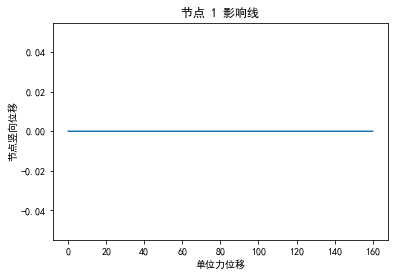

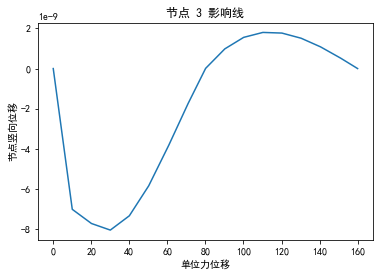

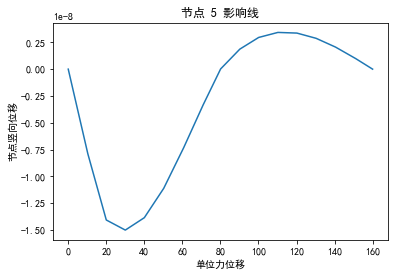

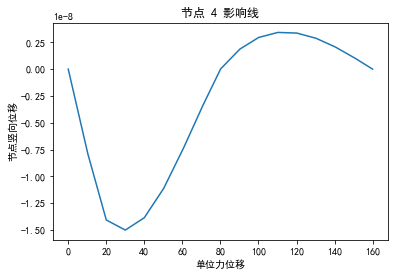

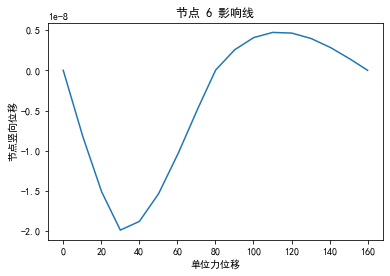

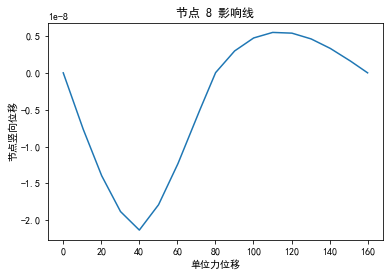

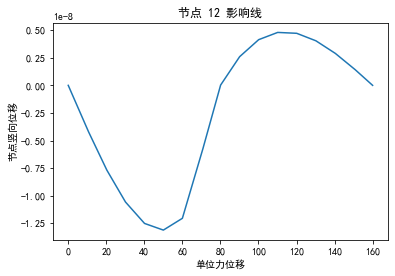

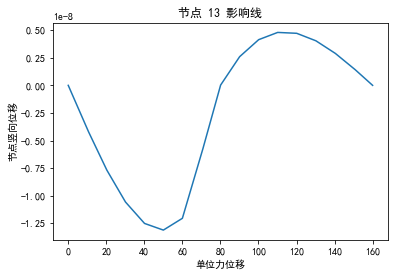

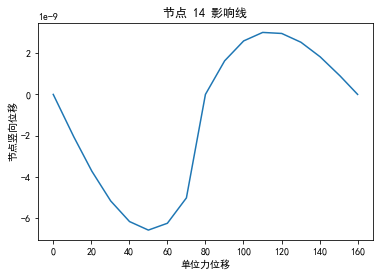

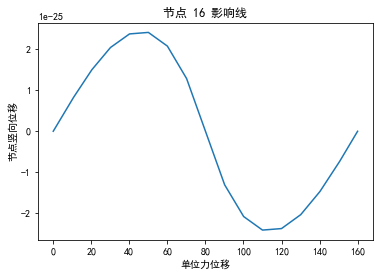

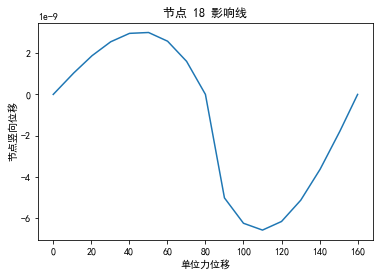

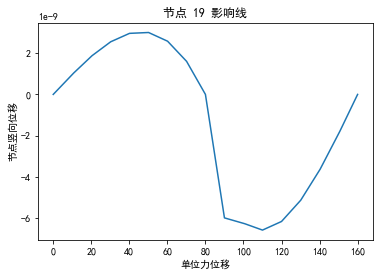

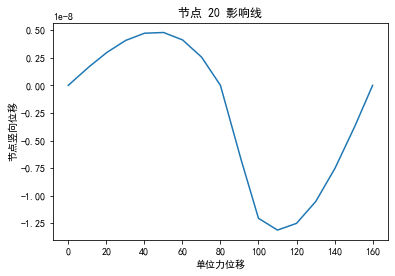

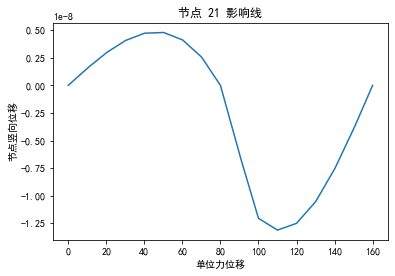

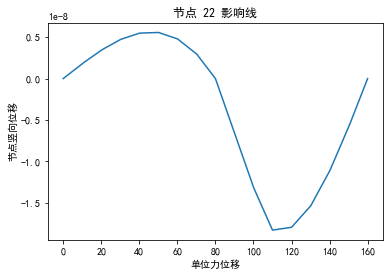

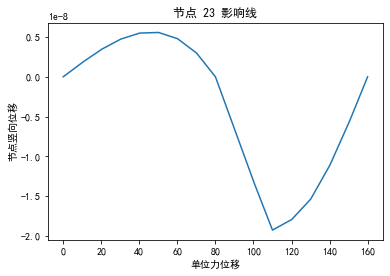

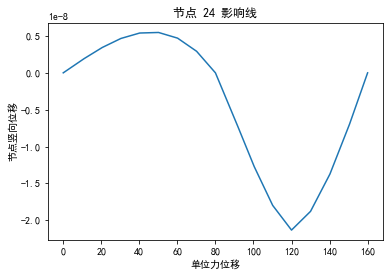

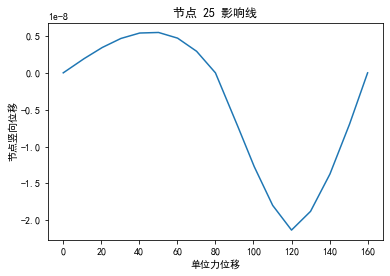

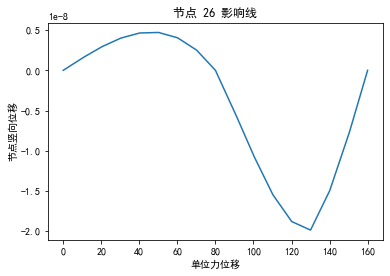

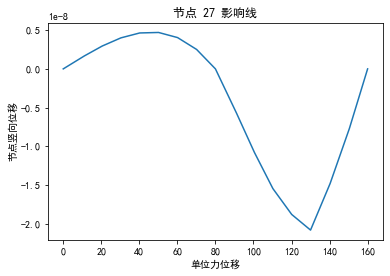

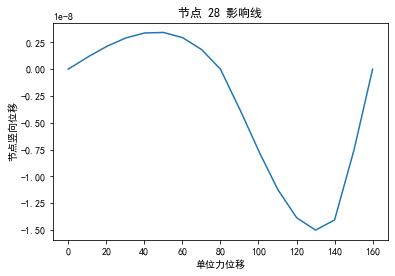

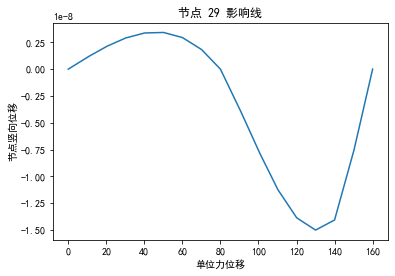

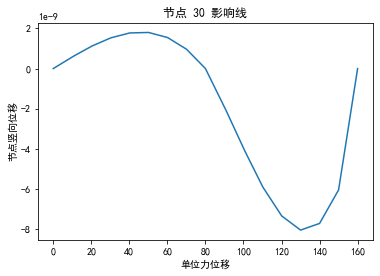

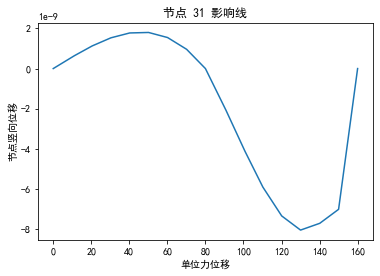

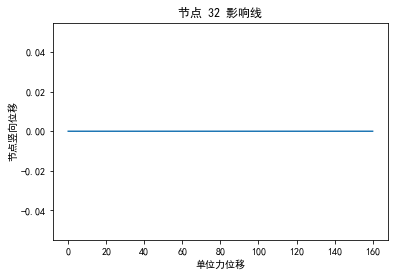

In [112]:
bridge.show_nodes_vdisps()

### ËΩ¥Âäõ‰∏éÂΩ±ÂìçÁ∫ø

In [125]:
bridge.get_units_axial_forces()

ÊâÄÊúâÊùÜ‰ª∂ÂçïÂÖÉËΩ¥ÂäõÂ∑≤ËÆ°ÁÆóÂÆåÊØï.
ÊâÄÊúâÈõ∂ÊùÜÂ∑≤Ê†áËØÜ.


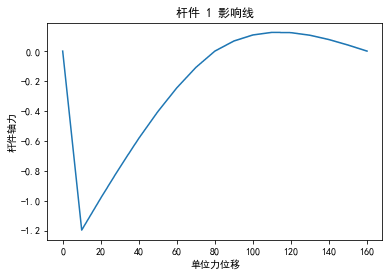

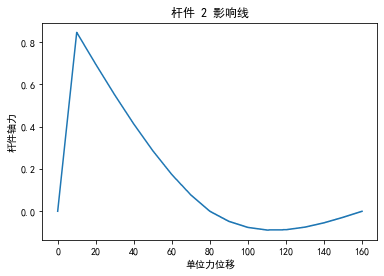

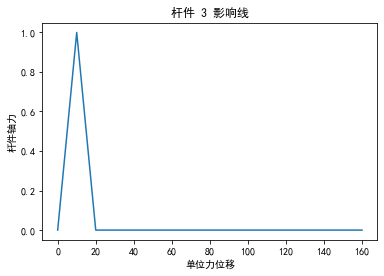

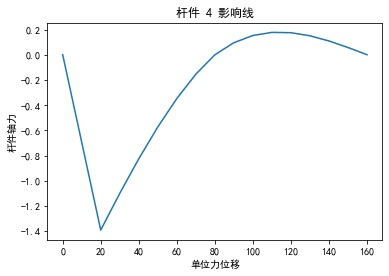

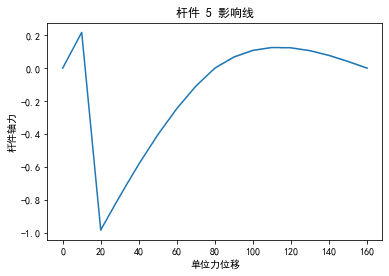

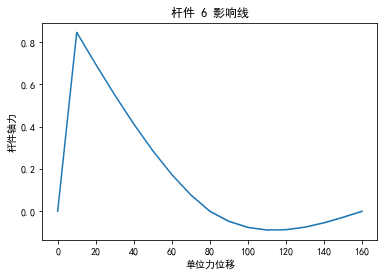

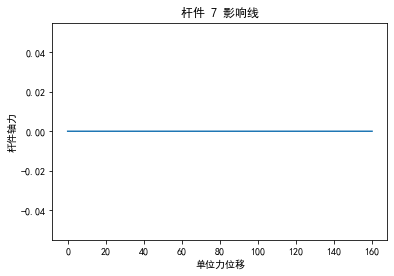

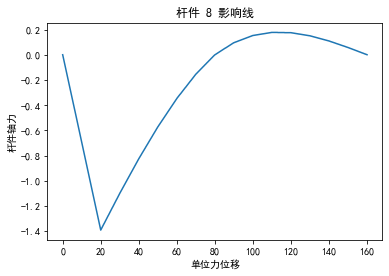

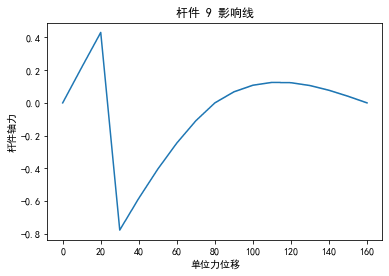

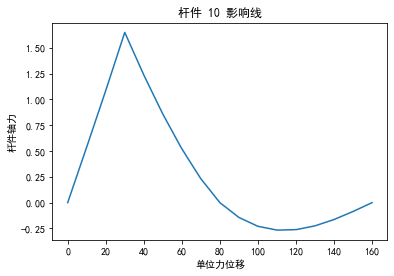

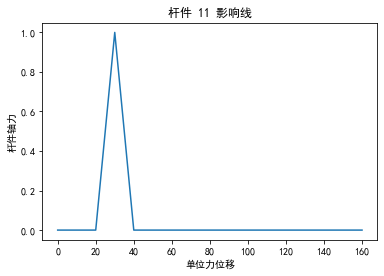

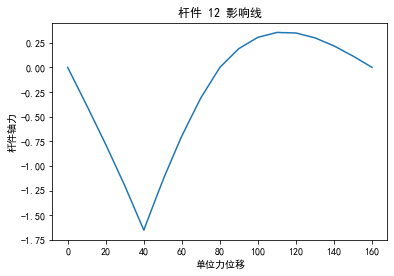

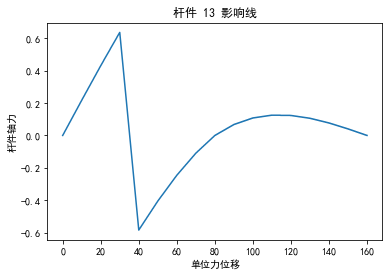

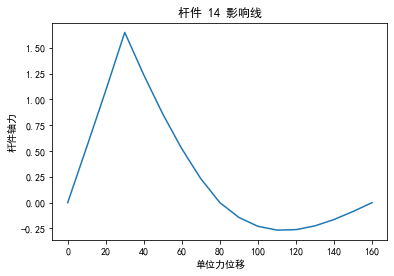

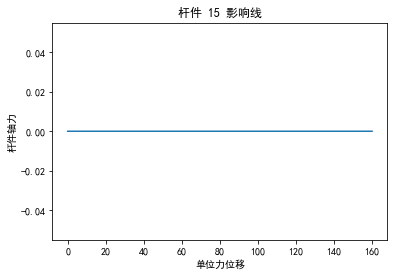

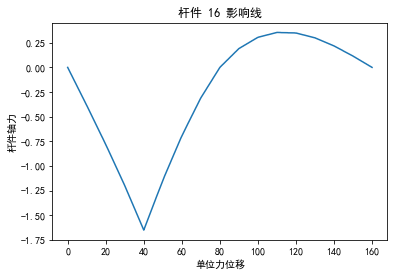

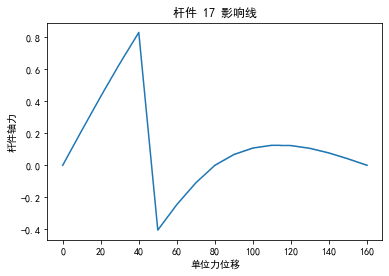

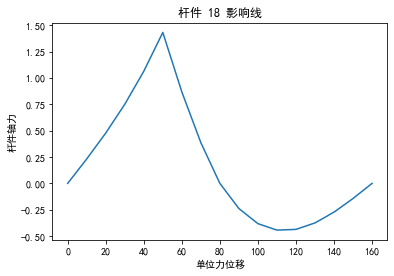

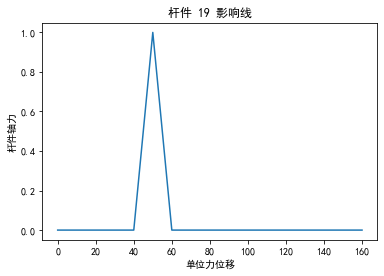

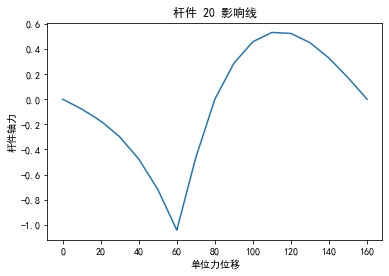

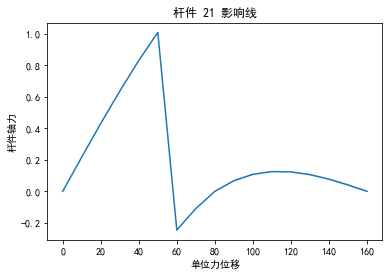

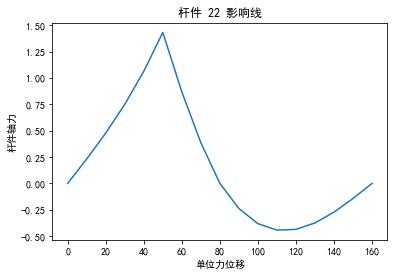

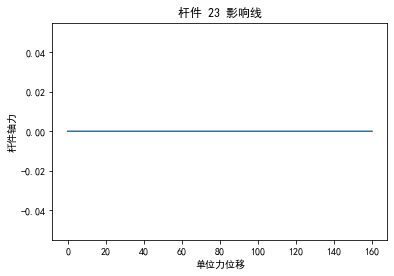

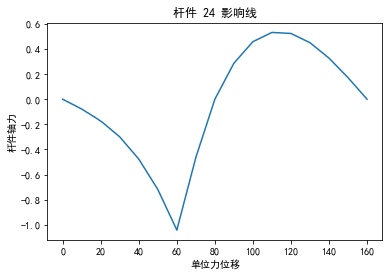

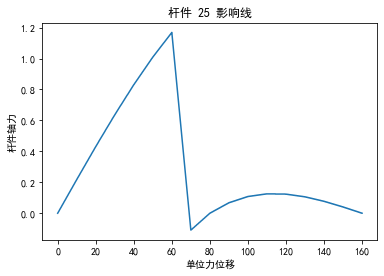

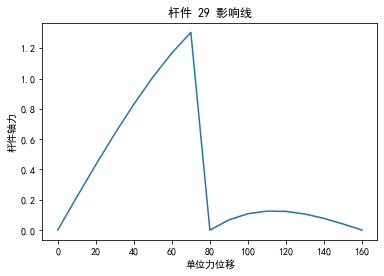

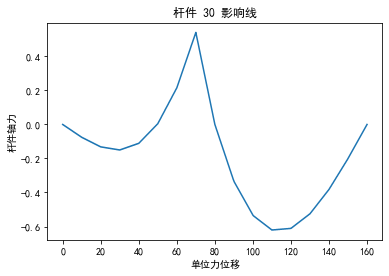

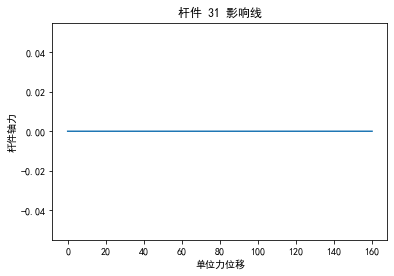

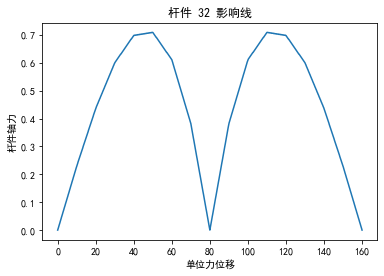

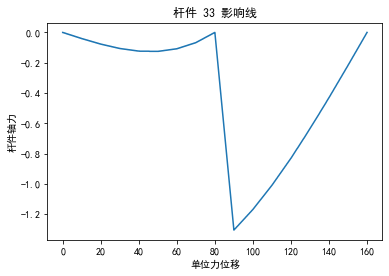

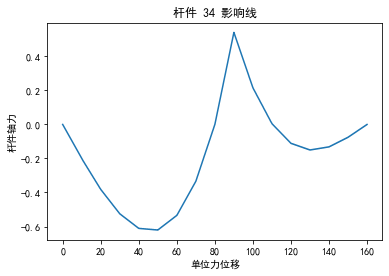

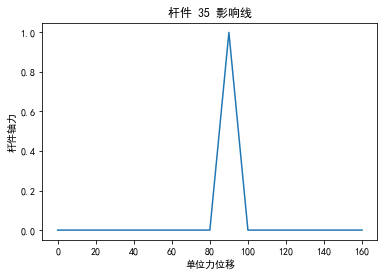

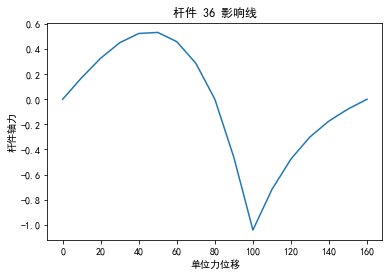

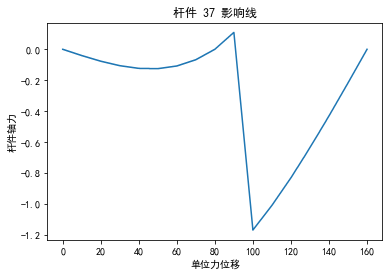

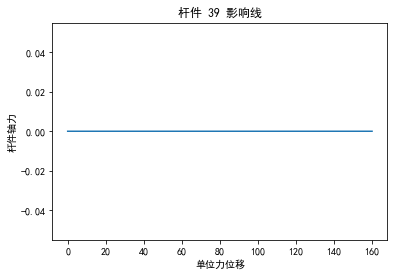

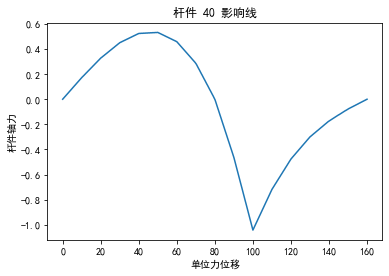

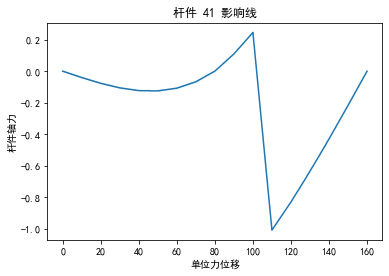

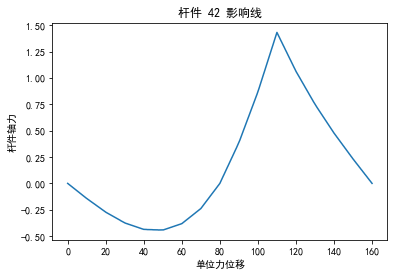

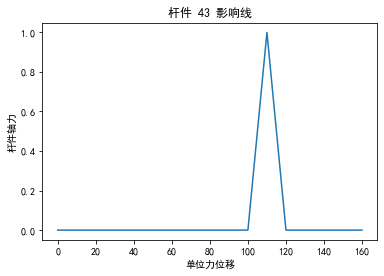

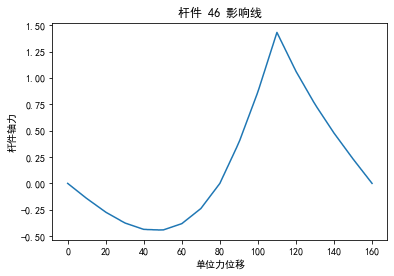

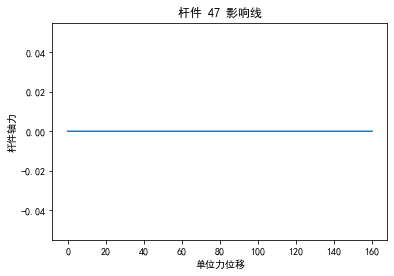

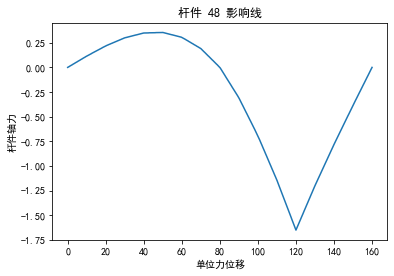

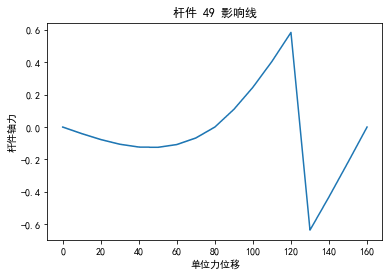

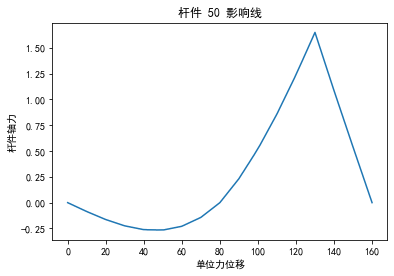

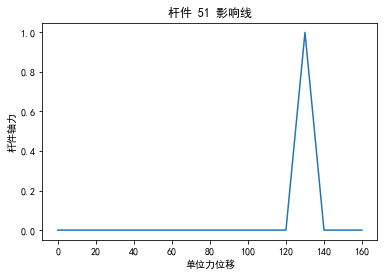

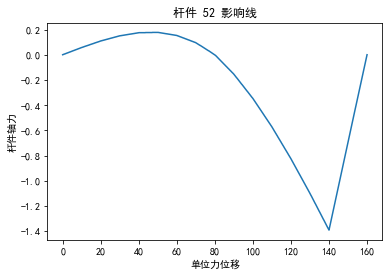

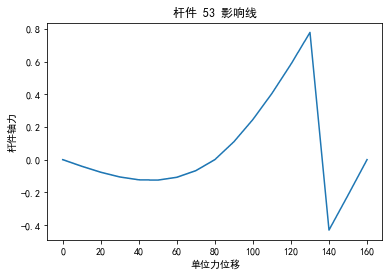

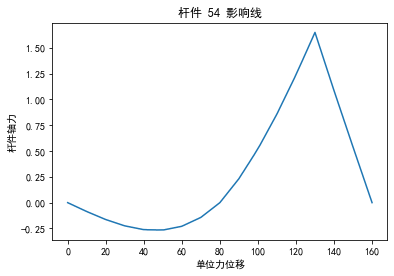

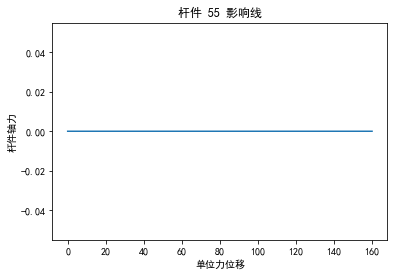

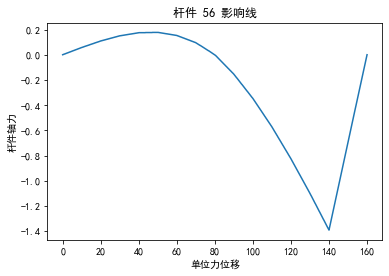

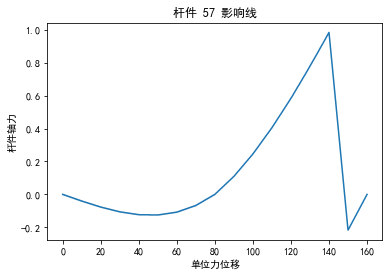

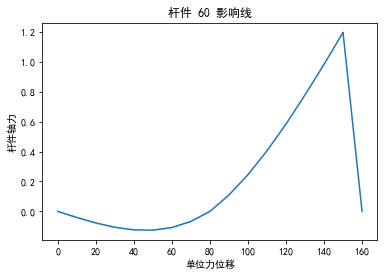

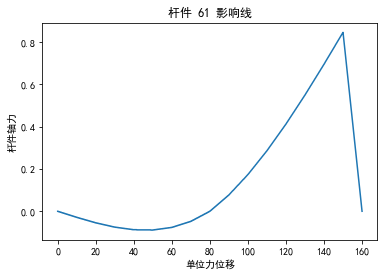

In [126]:
# ËΩ¥ÂäõÂΩ±ÂìçÁ∫ø
bridge.show_units_axial_forces()

In [127]:
bridge.get_worst_cases_load()

ÊâÄÊúâÊùÜ‰ª∂ÂçïÂÖÉÊúÄ‰∏çÂà©Ëç∑ËΩΩÂ∑≤ËÆ°ÁÆóÂÆåÊØï.


In [81]:
bridge.get_worst_cases_disps()

ÊâÄÊúâÊùÜ‰ª∂ÂçïÂÖÉÊúÄ‰∏çÂà©‰ΩçÁßªÂ∑≤ËÆ°ÁÆóÂÆåÊØï.


In [66]:
# Á´ñÊùÜ
bridge.vertical_units

[3, 7, 11, 15, 19, 23, 27, 31, 35, 39, 43, 47, 51, 55, 59]

## Ê£ÄÁÆó

### ÂàùÂßãÂåñÊà™Èù¢ÂèÇÊï∞

In [63]:
# Ê¢ÅÊà™Èù¢Êï∞ÊçÆ([ËÖπÊùøÂÆΩÂ∫¶ ÁøºÁºòÂéöÂ∫¶ ËÖπÊùøÂéöÂ∫¶ ÁøºÁºòÂÆΩÂ∫¶])
#             b2       t1      t2     b1
b1, t1, b2, t2 = [0.288, 0.04, 0.052, 0.024]
section_params = [b1, t1, b2, t2]

# ËÆæÁΩÆÊà™Èù¢ÂèÇÊï∞
bridge.set_section_params(bridge.units_nums, section_params)
#bridge.load_section_params(path)
bridge.update()

ÊâÄÊúâÂçïÂÖÉ [ÊØõÈù¢ÁßØ] Â∑≤ÈáçÊñ∞ËÆ°ÁÆó.
ÊâÄÊúâÂçïÂÖÉ [ÂçïÂÖÉÂàöÂ∫¶Áü©Èòµ] Â∑≤ÈáçÊñ∞ËÆ°ÁÆó.
[ÊÄª‰ΩìÂàöÂ∫¶Áü©Èòµ] Â∑≤ÈáçÊñ∞ËÆ°ÁÆó.
[Áº©ÂáèÂàöÂ∫¶Áü©Èòµ] Â∑≤ÈáçÊñ∞ËÆ°ÁÆó.
ÊâÄÊúâËäÇÁÇπÁ´ñÂêë‰ΩçÁßªÂ∑≤ËÆ°ÁÆóÂÆåÊØï.
ÊâÄÊúâÊùÜ‰ª∂ÂçïÂÖÉËΩ¥ÂäõÂ∑≤ËÆ°ÁÆóÂÆåÊØï.
ÊâÄÊúâÈõ∂ÊùÜÂ∑≤Ê†áËØÜ.
ÊâÄÊúâÊùÜ‰ª∂ÂçïÂÖÉÊúÄ‰∏çÂà©Ëç∑ËΩΩÂ∑≤ËÆ°ÁÆóÂÆåÊØï.
ÊâÄÊúâÊùÜ‰ª∂ÂçïÂÖÉÊúÄ‰∏çÂà©‰ΩçÁßªÂ∑≤ËÆ°ÁÆóÂÆåÊØï.


### Ê†πÊçÆÊúÄÂ§ßÂÜÖÂäõNËÅöÁ±ª

In [128]:
# Ââç‰∏ÄÂçäËäÇÁÇπÁºñÂè∑
target_units_nums = list(range(1, 40))

# Ê†πÊçÆÊúÄÂ§ßÂÜÖÂäõNËÅöÁ±ª
units_clusters = bridge.get_units_clusters(target_units_nums, n_clusters=7)
units_clusters

OrderedDict([(0, [1, 5, 26, 30, 34, 38]),
             (1, [28, 29, 32]),
             (2, [2, 6, 17, 21]),
             (3, [3, 7, 11, 13, 15, 19, 23, 27, 31, 35, 39]),
             (4, [4, 8, 12, 16, 33, 37]),
             (5, [10, 14, 18, 22, 25]),
             (6, [9, 20, 24, 36])])

In [129]:
for label, units_cluster in units_clusters.items():
    print('Á±ªÂà´ %d' % label)
    for unit_num in units_cluster:
        print(unit_num, bridge.units[unit_num].N)
    print()

Á±ªÂà´ 0
1 [-1195.205 -5643.693]
5 [ -393.548 -3882.148]
26 [ -537.53  -4608.036]
30 [ -537.53  -4608.036]
34 [ -537.53  -4608.036]
38 [ -537.53  -4608.036]

Á±ªÂà´ 1
28 [9605.214 3563.219]
29 [8408.331 2995.324]
32 [9605.214 3563.219]

Á±ªÂà´ 2
2 [4085.021  850.625]
6 [4085.021  850.625]
17 [3389.331  272.465]
21 [4955.437 1316.596]

Á±ªÂà´ 3
3 [1775.159  486.   ]
7 [ 0. -0.]
11 [1775.159  486.   ]
13 [1963.155 -932.486]
15 [ 0. -0.]
19 [1775.159  486.   ]
23 [ 0. -0.]
27 [1775.159  486.   ]
31 [ 0. -0.]
35 [1775.159  486.   ]
39 [ 0. -0.]

Á±ªÂà´ 4
4 [-1215.24  -6735.492]
8 [-1215.24  -6735.492]
12 [ -486.497 -7798.714]
16 [ -486.497 -7798.714]
33 [-2995.324 -8408.331]
37 [-2219.24  -6637.485]

Á±ªÂà´ 5
10 [7970.131 1093.863]
14 [7970.131 1093.863]
18 [6246.839 -606.885]
22 [6246.839 -606.885]
25 [6637.485 2219.24 ]

Á±ªÂà´ 6
9 [  696.988 -2313.712]
20 [ 2186.268 -3337.037]
24 [ 2186.268 -3337.037]
36 [ 2186.268 -3337.037]



In [165]:
'''
clusters == OrderedDict(
    [(0, [10, 14, 18, 22, 26, 30, 33, 36]),
     (1, [38]),
     (2, [3, 7, 11, 15, 19, 23, 27, 31, 35, 39]),
     (3, [12, 16, 20, 24]),
     (4, [2, 5, 6, 13, 17, 25, 28, 32]),
     (5, [37]),
     (6, [1, 4, 8, 9, 21, 29, 34])]
)
'''
# Ë°•ÂÖÖÂâ©‰ΩôËäÇÁÇπÁºñÂè∑
units_clusters[0] += [40, 45, 50, 54, 58, 62, 66, 70]
units_clusters[1] += [42]
units_clusters[2] += [43, 47, 51, 55, 59, 63, 67, 71, 75]
units_clusters[3] += [52, 56, 60, 64]
units_clusters[4] += [46, 49, 57, 68, 69, 72, 76]
units_clusters[5] += [41]
units_clusters[6] += [44, 48, 53, 61, 65, 73, 74, 77]

for i, cluster in units_clusters.items():
    print(i, cluster)

0 [12, 13, 14, 15, 16, 18, 40, 45, 50, 54, 58, 62, 66, 70]
1 [28, 29, 30, 31, 32, 33, 34, 42]
2 [2, 3, 5, 43, 47, 51, 55, 59, 63, 67, 71, 75]
3 [17, 19, 21, 39, 52, 56, 60, 64]
4 [1, 20, 22, 23, 24, 25, 26, 27, 37, 46, 49, 57, 68, 69, 72, 76]
5 [4, 6, 7, 8, 9, 10, 11, 41]
6 [35, 36, 38, 44, 48, 53, 61, 65, 73, 74, 77]


### ‰øùÂ≠òÊùÜ‰ª∂ËÅöÁ±ªÊï∞ÊçÆ

In [ ]:
with open('units_clusters.json', 'w') as units_clusters_file:                                
    json.dump(units_clusters, units_clusters_file)

### ËØªÂèñÊùÜ‰ª∂ËÅöÁ±ªÊï∞ÊçÆ

In [ ]:
# units_clusters = bridge.load_units_clusters(path)

### ÂàõÂª∫Ê£ÄÁÆóÂô®

In [ ]:
bridge.check()
checker = Checker(bridge)

### Ë∞ÉËäÇÊà™Èù¢ÂèÇÊï∞

In [ ]:
# b = 2 * t1 + b2 = 0.46
# h = 2 * b1 + t2 = 0.76
B = {
    '0':  0.46, 
    '1':  0.46, 
    '2':  0.46, 
    '3':  0.46,
    '4':  0.46, 
    '5':  0.46, 
    '6':  0.46
}

T1 = {
    '0':  0.022,  
    '1':  0.022,  
    '2':  0.022, 
    '3':  0.022,
    '4':  0.022, 
    '5':  0.022, 
    '6':  0.022 
}


H = {
    '0':  0.60,  
    '1':  0.76,  
    '2':  0.44, 
    '3':  0.44,
    '4':  0.76, 
    '5':  0.60, 
    '6':  0.60 
}


T2 = {
    '0':  0.022,  
    '1':  0.022,  
    '2':  0.022, 
    '3':  0.022,
    '4':  0.022, 
    '5':  0.022, 
    '6':  0.022 
}

In [ ]:
for label, units_cluster in units_clusters.items():
    # ÊØè‰∏ÄÁ±ªÁöÑÂèÇÊï∞
    b, t1 = B[label], T1[label]
    b2 = b - 2 * t1
    
    h, t2 = H[label], T2[label]
    b1 = (h - t2) / 2
    
    section_params = [b2, t1, t2, b1]
    bridge.set_section_params(units_cluster, section_params)          

bridge.update()

### Ê£ÄÁÆóÊâÄÊúâÊùÜ‰ª∂

In [ ]:
checker.check_all()

### ÂçïÁã¨ËøõË°åÊüêÁßçÁ±ªÂûãÊ£ÄÁÆó

### ÊµãËØïüëá

In [38]:
np.array([1, 2])

array([1, 2])

In [49]:
def a():
    x = 1
    b()
    c()
    print(x)
def b():
    global x
    x += 1
def c():
    global x
    x += 1

In [50]:
a()

NameError: name 'x' is not defined